# Projekat iz predmeta analiza socijalnih mreza


## Kvantitativna i kvalitativna Analiza stanja profesionalnog muškog tenisa u periodu od 2018. do 2020. godine


Ucitavanje podataka


In [31]:
import pandas as pd

dataPath = "data/atp_matches_2018.csv"

players_dataPath = "data/atp_players.csv"

player_atp_rankings_dataPath = "data/atp_rankings_10s.csv"

data = pd.read_csv(dataPath) 
#print(data.columns)
data.isna().any()

#players
players_data = pd.read_csv(players_dataPath)
#print(players_data)

#atp ranking
players_atp_rank_data = pd.read_csv(player_atp_rankings_dataPath)
players_atp_rank_data.isna().any()
#points null moze biti
#print(players_atp_rank_data)

ranking_date    False
rank            False
player          False
points           True
dtype: bool

In [32]:
#provera da li je match_num kolona koja moze da bude uzeta za id

print(data['match_num'].isnull().values.any())
print(data['match_num'].is_unique)

False
False


In [33]:
#dodati automatski generisani id kao dodatnu kolonu
data['id'] = data.index
print(data)

#sacuvati u novi fajl
import pickle

with open("data/data2018_cleaned.csv", 'wb') as file:
    pickle.dump(data, file)

                          tourney_id                tourney_name surface  \
0                          2018-M020                    Brisbane    Hard   
1                          2018-M020                    Brisbane    Hard   
2                          2018-M020                    Brisbane    Hard   
3                          2018-M020                    Brisbane    Hard   
4                          2018-M020                    Brisbane    Hard   
...                              ...                         ...     ...   
2884                       2018-0605                 Tour Finals    Hard   
2885                       2018-0605                 Tour Finals    Hard   
2886  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2887  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2888  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   

      draw_size tourney_level  tourney_date  match_num  winner_id  \
0            32   

In [34]:
import numpy as np

# Selekcija samo kolona 'match_num' i 'id' i grupisanje po match_num
data_grupisano = data[['match_num', 'id']].groupby('match_num')

# agg() radi agregaciju, u ovom slučaju po broju elemenata u grupi
data_agregirano = data_grupisano['id'].agg(np.size)
print(type(data_agregirano))
print(data_agregirano)

<class 'pandas.core.series.Series'>
match_num
1      67
2      67
4      67
5      35
100     3
       ..
503     1
504     1
601     1
602     1
701     1
Name: id, Length: 233, dtype: int64


In [35]:
data_nonunique = data_agregirano[data_agregirano>1]
print(data_nonunique)

match_num
1      67
2      67
4      67
5      35
100     3
       ..
296    64
297    64
298    64
299    64
300    64
Name: id, Length: 200, dtype: int64


In [36]:
#naci max i index max broja ponovljenih
trazeni = data_nonunique[data_nonunique == data_nonunique.max()]
print(trazeni)
target_match_num = trazeni.keys()[0]
print(target_match_num)

match_num
1    67
2    67
4    67
Name: id, dtype: int64
1


In [37]:
#ispisati sve meceve kao match_num imaju odredjeni max
data_target = data[data['match_num'] == target_match_num]
lista_labela = ['tourney_name', 'winner_id', 'loser_id', 'winner_rank', 'loser_rank']
print(data_target[lista_labela])

#ispisi sve ciji je ili winner_rank null ili loser_rank null
data_winOrlos_is_null = data_target[(data_target['winner_rank'].isnull()) | (data_target['loser_rank'].isnull())]
print(data_winOrlos_is_null)

#istraga o igracima ciji je winner_rank u tabeli matches_2018 null ili loser_rank u tabeli matches_2018 null
print(players_data['player_id'].equals(data_winOrlos_is_null['winner_id']))
players_info_rang_null = players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))]
print(players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))])

#postoje neki koji uopste nemaju upisanu ruku i datum rodjenja, datum rodjenja format double iako u opisu drugaciji format

                     tourney_name  winner_id  loser_id  winner_rank  \
266   Davis Cup G1 R1: AUT vs BLR     105589    125802         98.0   
270   Davis Cup G1 R1: CHI vs ECU     111797    105111         95.0   
273   Davis Cup G1 R1: CHN vs NZL     104907    105842        308.0   
276   Davis Cup G1 R1: COL vs BAR     123755    104656        292.0   
279   Davis Cup G1 R1: DOM vs BRA     105497    106252        284.0   
...                           ...        ...       ...          ...   
2425  Davis Cup WG SF: FRA vs ESP     105332    105807         54.0   
2429  Davis Cup G2 R3: ROU vs POL     105657    111794         81.0   
2433  Davis Cup G2 R3: THA vs LBN     200273    106397        643.0   
2437  Davis Cup G2 R3: URU vs MEX     104655    106250         68.0   
2886   Davis Cup WG F: FRA vs CRO     106432    104871         12.0   

      loser_rank  
266        190.0  
270        597.0  
273        253.0  
276          NaN  
279        365.0  
...          ...  
2425        21

In [38]:
#players_info_rang_null 
#players_atp_rank_data
columns_name_players_atp_rank = ['ranking_date', 'rank', 'player', 'points']
print(players_atp_rank_data[columns_name_players_atp_rank])
print(players_atp_rank_data[columns_name_players_atp_rank].groupby('player').mean())

        ranking_date  rank  player   points
0           20100104     1  103819  10550.0
1           20100104     2  104745   9205.0
2           20100104     3  104925   8310.0
3           20100104     4  104918   7030.0
4           20100104     5  105223   6785.0
...              ...   ...     ...      ...
916291      20191230  1922  134833      1.0
916292      20191230  1922  144856      1.0
916293      20191230  1922  202326      1.0
916294      20191230  1926  207307      1.0
916295      20191230  1927  208186      1.0

[916296 rows x 4 columns]
        ranking_date         rank       points
player                                        
100644  2.015885e+07   247.552326  2102.796512
101389  2.014282e+07  1724.404255     1.000000
101397  2.011134e+07  1204.478261     3.000000
101404  2.011255e+07  1031.626374     6.571429
101549  2.010697e+07  1468.750000     1.000000
...              ...          ...          ...
209397  2.019123e+07  1581.000000     1.000000
209398  2.019122e+07  

In [39]:
import networkx as nx

list_winner = set(data['winner_id'].apply(str).unique())
#print(list_winner)
list_loser = set(data['loser_id'].apply(str).unique())
#print(list_loser)

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

print(data.columns)

Postoji 419 različitih igrača
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'id'],
      dtype='object')


In [40]:
#videti timestamp u tabeli 10s, iz koje je godine, i koji je datum
#proveriti za podatke za 2018, 2019 u fajlovima koji objasnjavaju meceve, neki mec posle tog datuma koji pise u 10s fajlu
print(players_atp_rank_data.columns)
print(players_atp_rank_data['player'].is_unique)
#players_atp_rank_data.dtypes
maska_active_players = players_atp_rank_data['player'].isin(skup_id) & (players_atp_rank_data['ranking_date']<=20181231) & (players_atp_rank_data['ranking_date']>=20180101)
players_rank_2018 = players_atp_rank_data[maska_active_players]
players_rank_2018 = players_rank_2018.drop_duplicates()

max_players_rank_2018 = players_rank_2018.groupby('player').max()
#print(players_rank_2018[['ranking_date', 'rank', 'player', 'points']].groupby('player').agg({'ranking_date': 'max'}))
#print(players_rank_2018.sort_values('ranking_date').groupby('player').tail(1))
#print(max_players_rank_2018['player'].is_unique)

player_sorted_date_rank_2018 = players_rank_2018.sort_values(['ranking_date'],ascending=False).groupby('player').head(1)
#player_sorted_date_rank_2018 = player_sorted_date_rank_2018['points'].map(str)
#player_sorted_date_rank_2018 = player_sorted_date_rank_2018['rank'].map(str)
print(player_sorted_date_rank_2018.dtypes)
print(players_rank_2018.sort_values(['ranking_date'],ascending=False).groupby('player').head(1))


Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')
False
ranking_date      int64
rank              int64
player            int64
points          float64
dtype: object
        ranking_date  rank  player  points
857151      20181231   653  138846     1.0
856052      20181231   104  105155   550.0
856056      20181231   106  106058   540.0
856058      20181231   107  132283   532.0
856060      20181231   108  200000   527.0
...              ...   ...     ...     ...
826220      20180917   846  104597    20.0
825114      20180910  1700  126526     1.0
825258      20180910  1867  105961     1.0
809171      20180702  1491  207400     2.0
807528      20180625  1786  202462     1.0

[392 rows x 4 columns]


In [41]:
#provera da li je stvarno poslednji rang 2018-te godine
#print(players_rank_2018[players_rank_2018['player']==200000].sort_values('ranking_date', ascending=False))

#provera da li su svi elementi iz skup_id prisuni u tabeli player_sorted_date_rank_2018
difference_set = set(map(int, skup_id)).difference(set(player_sorted_date_rank_2018['player']))
print(len(difference_set))

maska_diff_nodes_winner = data['winner_id'].isin(difference_set) 
maska_diff_nodes_loser =  data['loser_id'].isin(difference_set)
active_columns_winner = ['winner_id', 'winner_name', 'winner_rank', 'winner_rank_points']
active_columns_loser = ['loser_id', 'loser_name', 'loser_rank', 'loser_rank_points']
winner_miss_data = data[active_columns_winner][maska_diff_nodes_winner]
print(f"Broj nedefinisanih u pobednicima: {len(winner_miss_data)}")
print(winner_miss_data)
loser_miss_data = data[active_columns_loser][maska_diff_nodes_loser]
loser_miss_data.rename(columns = {'loser_id':'winner_id', 'loser_name':'winner_name', 'loser_rank':'winner_rank', 'loser_rank_points':'winner_rank_points'}, inplace = True)
#loser_miss_data.rename_axis({'winner_id', 'winner_name', 'winner_rank', 'winner_rank_points'}, axis="columns")
#loser_miss_data.to_replace(to_replace = active_columns_loser, value = active_columns_winner, inplace=True)
print(f"Broj nedefinisanih u gubitnicima: {len(loser_miss_data)}")
print(loser_miss_data)
#missed_data=loser_miss_data.append(winner_miss_data).drop_duplicates()
#missed_data.rename(columns = {'winner_id' : 'player', 'winner_rank' : 'rank', 'winner_rank_points' : 'points'}, inplace=True)
#print(f"Broj nedefinisanih u gubitnicima: {missed_data}")


27
Broj nedefinisanih u pobednicima: 6
     winner_id              winner_name  winner_rank  winner_rank_points
283     103529     Aisam Ul Haq Qureshi          NaN                 NaN
330     127570             Rodrigo Arus          NaN                 NaN
351     200460  John Bryan Decasa Otico          NaN                 NaN
356     111167              Ugo Nastasi          NaN                 NaN
957     208029              Holger Rune          NaN                 NaN
983     208028         Francisco Llanes          NaN                 NaN
Broj nedefinisanih u gubitnicima: 28
     winner_id                      winner_name  winner_rank  \
32      106325                  Jabor Al Mutawa          NaN   
91      105030                    Michael Venus          NaN   
274     105030                    Michael Venus          NaN   
276     104656                      Haydn Lewis          NaN   
278     207971                  Xavier Lawrence          NaN   
326     200483               

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sys

data_reduced = data[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'id']]


G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

for _, winner_id, winner_name, winner_ioc, loser_id, loser_name, loser_ioc, _ in data_reduced.itertuples():
    winner_id_string = str(winner_id)
    loser_id_string = str(loser_id)
    if (winner_id_string, loser_id_string) in G.edges:
        G.edges[winner_id_string, loser_id_string]['weight'] += 1
    else:
        G.add_edge(winner_id_string, loser_id_string, weight=1)
        
        winner = player_sorted_date_rank_2018[player_sorted_date_rank_2018['player'] == int(winner_id)]
        
        if winner.empty:
            winner_rank = str(sys.maxsize)
            winner_points = str(0)
        else:
            winner_rank = str(winner['rank'].values[0])
            winner_points = str(winner['points'].values[0])
        
        loser = player_sorted_date_rank_2018[player_sorted_date_rank_2018['player'] == int(loser_id)]
        
        if loser.empty:
            loser_rank = str(sys.maxsize)
            loser_points = str(0)
        else:
            loser_rank = str(loser['rank'].values[0])
            loser_points = str(loser['points'].values[0])
        winner_attrs = {winner_id_string: {'name': winner_name, 'country': winner_ioc, 'rank': winner_rank, 'points': winner_points}}
        loser_attrs = {loser_id_string: {'name': loser_name, 'country': loser_ioc, 'rank': loser_rank, 'points': loser_points}}
        nx.set_node_attributes(G, winner_attrs)
        nx.set_node_attributes(G, loser_attrs)




In [43]:
print(data.dtypes)
#print(G.edges.data("weight"))
print(nx.get_node_attributes(G, "name"))
print(nx.get_node_attributes(G, "country"))
print(nx.get_node_attributes(G, "points"))

output_path = "models/undirected_graph_2018.gml"

nx.write_gml(G, output_path)


tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

1.pitanje Koliki je prosecan broj tenisera(saigraca) po svakom teniseru? 
gephi->ucitala graf, Statistics -> Network Overview -> Average Degree

<img src="img/1.pitanje_average_degree" width=500 height=500 />

In [44]:
#2.pitanje Koji teniseri su se susretali sa najvecim brojem drugih tenisera
my_degrees = dict(G.degree()) #dictionary key:value
degree_values = [v for k, v in G.degree()]

print(max(my_degrees.items(), key= lambda x: x[1])) #max u tom dict 

print(nx.get_node_attributes(G, 'name')['104926']) #atribut name za cvor ciji je index rezultat prethodnog upita

('104926', 61)
Fabio Fognini


In [45]:
#3.pitanje Koji teniseri su ucestvovali na najvecem broju (razlicih) turnira?
winner_tourney_columns = ['winner_id', 'tourney_id']
loser_tourney_columns = ['loser_id', 'tourney_id']

dataWinner_tourney = data[winner_tourney_columns].drop_duplicates()
dataWinner_tourney = dataWinner_tourney.rename(columns = {'winner_id': 'player_id'})
print(dataWinner_tourney)

dataLoser_tourney = data[loser_tourney_columns].drop_duplicates()
dataLoser_tourney = dataLoser_tourney.rename(columns = {'loser_id': 'player_id'})
print(dataLoser_tourney)

#unija pobednika i gubitnika sa preimenovanom kolonom player_id, zbog konkatenacije
dataWinnerAndLoserUnion = pd.concat([dataWinner_tourney, dataLoser_tourney], ignore_index=True)
print(dataWinnerAndLoserUnion)

#izbaci duplikate
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.drop_duplicates()
print(dataWinnerAndLoserUnion)

#grupisi po player_id pa izdvoj po sumi
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.groupby('player_id').count()
print(dataWinnerAndLoserUnion)


print(nx.get_node_attributes(G, 'name')['100644'])
print(nx.get_node_attributes(G, 'name')['103333'])

#proveri presek, datawinner.drop_duplicates, dataloser.drop_dupicates pa onda preimenuj kolone u id, unija pa onda drop_duplicates, pa group_by pa count pa onda uzmes resenje


      player_id                      tourney_id
0        105992                       2018-M020
1        111577                       2018-M020
2        104797                       2018-M020
3        200282                       2018-M020
4        111581                       2018-M020
...         ...                             ...
2877     105227                       2018-0605
2878     100644                       2018-0605
2880     104925                       2018-0605
2886     106432  2018-M-DC-2018-WG-M-FRA-CRO-01
2887     105227  2018-M-DC-2018-WG-M-FRA-CRO-01

[1587 rows x 2 columns]
      player_id                      tourney_id
0        104919                       2018-M020
1        111442                       2018-M020
2        106000                       2018-M020
3        105449                       2018-M020
4        105643                       2018-M020
...         ...                             ...
2882     100644                       2018-0605
2885     104925

In [46]:
#4.pitanje Koji teniseri su dobri kandidati za predstavnike profesionalnih tenisera? Da li se i sta se menja ukoliko se umesto jednog bira skup od nekoliko predstavnika? Dobar predstavnik ili predstavnici bi trebalo da budu u kontaktu sa sto vecim skupom tenisera

#proveriti ovaj 2.deo na sta se odnosi????
#mere centralnosti koristim Degree centrality, vise u kontaktu sa drugim teniserima teze da budu predstavnici
import operator
dictionary = dict(nx.degree_centrality(G))
print(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:5])

[('104926', 0.14593301435406697), ('106233', 0.13157894736842105), ('126774', 0.12679425837320574), ('100644', 0.12440191387559808), ('104755', 0.12200956937799043)]


In [47]:
print(nx.get_node_attributes(G, 'name')['104926'])
print(nx.get_node_attributes(G, 'name')['106233'])
print(nx.get_node_attributes(G, 'name')['126774'])
print(nx.get_node_attributes(G, 'name')['100644'])
print(nx.get_node_attributes(G, 'name')['104755'])

Fabio Fognini
Dominic Thiem
Stefanos Tsitsipas
Alexander Zverev
Richard Gasquet


5) Kako su rangirani na ATP listi teniseri koji su se susretali sa najvećim brojem drugih tenisera?

Rang prvih 10 tenisera koji su se susreli sa najvecim brojem drugih tenisera.

In [48]:
sorted_dict =dict(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:40]) 
for key in sorted_dict:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key])
    


Fabio Fognini 13 ITA
Dominic Thiem 8 AUT
Stefanos Tsitsipas 15 GRE
Alexander Zverev 4 GER
Richard Gasquet 26 FRA
Gilles Simon 30 FRA
Karen Khachanov 11 RUS
Daniil Medvedev 16 RUS
Joao Sousa 44 POR
Denis Shapovalov 27 CAN
Adrian Mannarino 42 FRA
Fernando Verdasco 28 ESP
Marin Cilic 7 CRO
Damir Dzumhur 47 BIH
Frances Tiafoe 39 USA
Kevin Anderson 6 RSA
Nikoloz Basilashvili 21 GEO
Kei Nishikori 9 JPN
Milos Raonic 18 CAN
Robin Haase 50 NED
Kyle Edmund 14 GBR
Juan Martin del Potro 5 ARG
Steve Johnson 33 USA
Roger Federer 3 SUI
Roberto Bautista Agut 24 ESP
Diego Schwartzman 17 ARG
Borna Coric 12 CRO
Gael Monfils 29 FRA
Guido Pella 58 ARG
Novak Djokovic 1 SRB
Hyeon Chung 25 KOR
Peter Gojowczyk 59 GER
Dusan Lajovic 48 SRB
Benoit Paire 52 FRA
Jan Lennard Struff 57 GER
Pablo Carreno Busta 23 ESP
Mischa Zverev 69 GER
Malek Jaziri 45 TUN
Leonardo Mayer 56 ARG
Ryan Harrison 62 USA


6) Iz kojih zemalja dolazi najveći broj aktivnih igrača u proteklom periodu?

Prvo kreiramo masku koja ce da selektuje sve igrace koji su u skupu igraca koji su igrali mec u 2018
Potom dobijen rezultat grupisemo po drzavi i sortiramo zatim
Najaktivniji su iz SAD, Francuske, Spanije, Nemacke, Italije
Srbija na 9 mestu sa Rusijom i Kanadom sa 7 aktivnih igraca

In [49]:
maska_active_players = players_data['player_id'].isin(skup_id) 
active_players_2018 = players_data[maska_active_players]
data_grupisano = active_players_2018[['player_id', 'country_code']].groupby('country_code')
data_agregirano = data_grupisano['country_code'].agg(np.size)

print(data_agregirano.sort_values(ascending=False).head(20))

country_code
USA    34
FRA    25
ESP    24
GER    18
ITA    17
ARG    15
AUS    14
AUT     8
RUS     7
CAN     7
SRB     7
GBR     6
CZE     6
CRO     6
ROU     6
SVK     6
SUI     6
BRA     6
TPE     6
IND     6
Name: country_code, dtype: int64


7) Iz kojih zemalja dolaze najuspešniji igrači u smislu osvojenih poena na ATP listi?

Najuspesniji igraci u 2018 su iz Srbije, Spanije, Svajcarske, Nemacke, Argentine..

U prvih 30 najvise ima tenisera iz Spanije i Francuske, Srbija se nalazi na 4 mestu po broju tenisera u prvih 30


In [50]:
sorted_success_players = player_sorted_date_rank_2018.sort_values('points',ascending=False).head(30)
data_needed_columns = data[['winner_id', 'winner_ioc', 'winner_name']].drop_duplicates();


merged_inner_data_players = pd.merge(left=sorted_success_players, right=data_needed_columns, left_on='player', right_on='winner_id')
print("Prvih 30 tenisera na svetu su dati u sledecoj listi")
print(merged_inner_data_players[['winner_ioc', 'winner_name', 'points']])

data_grupisano = merged_inner_data_players[['winner_id', 'winner_ioc']].groupby('winner_ioc')
data_agregirano = data_grupisano['winner_ioc'].agg(np.size)

print("Grupisani po drzavama iz kojih dolaze imamo sledeci skup:")
print(data_agregirano.sort_values(ascending=False).head(30))

Prvih 30 tenisera na svetu su dati u sledecoj listi
   winner_ioc            winner_name  points
0         SRB         Novak Djokovic  9045.0
1         ESP           Rafael Nadal  7480.0
2         SUI          Roger Federer  6420.0
3         GER       Alexander Zverev  6385.0
4         ARG  Juan Martin del Potro  5300.0
5         RSA         Kevin Anderson  4710.0
6         CRO            Marin Cilic  4250.0
7         AUT          Dominic Thiem  4095.0
8         JPN          Kei Nishikori  3590.0
9         USA             John Isner  3155.0
10        RUS        Karen Khachanov  2835.0
11        CRO            Borna Coric  2480.0
12        ITA          Fabio Fognini  2315.0
13        GBR            Kyle Edmund  2150.0
14        GRE     Stefanos Tsitsipas  2095.0
15        RUS        Daniil Medvedev  1977.0
16        ARG      Diego Schwartzman  1880.0
17        CAN           Milos Raonic  1855.0
18        BUL        Grigor Dimitrov  1835.0
19        ITA       Marco Cecchinato  1819.0
20 

Analiza komuna

U realnim mrezama mogu se uociti gusce povezani delovi mreze, odredjeni broj aktera bolje povezani nego sa ostalim clanovima mreze -> grupe ili zajednica. Mogu biti odvojene ili delimicno se preklapati.

Modularnost je mera kvaliteta particionisanja cvorova mreze u odgovarajuce klastere.

1. implementiracemo bottom-up pristup -> Louvain metod
2. primenicemo metriku modularnosti i analizu u Gephi alatu da bismo analizirali izdvojene komune/klastere i prikazali ih

{'105467': 18, '104022': 1, '105554': 20, '105292': 18, '200031': 20, '105671': 20, '106044': 4, '124079': 5, '121411': 6, '105732': 7, '106214': 20, '126846': 5, '105587': 1, '132283': 1, '206000': 1, '200711': 5, '104745': 8, '105063': 5, '105515': 7, '106072': 5, '104593': 4, '106401': 5, '104122': 5, '105589': 5, '123795': 1, '105882': 20, '105943': 7, '104534': 1, '104755': 7, '202165': 12, '106281': 5, '106043': 5, '200514': 6, '103852': 5, '122078': 10, '106121': 20, '200278': 6, '200045': 12, '109698': 13, '105676': 8, '106432': 8, '200384': 20, '105614': 15, '105502': 8, '126613': 1, '105430': 15, '105691': 20, '104925': 8, '127339': 15, '106138': 6, '104907': 15, '108739': 18, '111192': 20, '207415': 16, '106150': 12, '105577': 8, '111459': 7, '105163': 8, '104731': 8, '124126': 17, '111200': 20, '126523': 7, '126174': 13, '111153': 1, '105967': 10, '144817': 10, '103970': 8, '106233': 8, '105899': 18, '104926': 20, '126102': 1, '105641': 1, '110602': 6, '105932': 8, '105902'

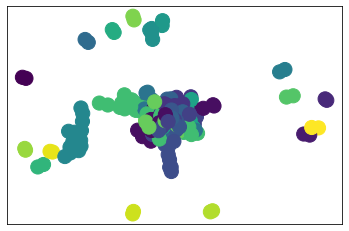

In [51]:
import sys
!{sys.executable} -m pip install python-louvain
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
partition = community_louvain.best_partition(G)

print(partition)

#vizuelno
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=200, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=1)
plt.show()


Gephi alat i analiza izdvojenih komuna primenom analize modularnosti


<img src="img/modularity_analysis.png" width=1000 height=1000 />

Po opadajucim vrednostima 5 komuna sa najvecom modularnoscu: 

<img src="img/top5ValueModularityClass.png" width=1000 height=1000 />

Uoceno je da mreze sa vecom modularnoscu podeljene na klastere koji su, unutar sebe, gusto povezani. Ovakve mreze po definiciji, ali i sto se da videti sa prilozenih slika, nemaju veliki broj veza sa ostatkom mreze.

#TODO objasnjenje za detektovane komune, analiziraj tenisere, da li postoji veza izmedju njih i zasto su oni bas bolje povezani.



10. Sprovesti analizu klasterisanja i asortativnu analizu, pa uporediti grupisanje na osnovu zemlje iz koje igrači dolaze, na osnovu broja mečeva koje igraju i na osnovu rejtinga


Lokalni koeficijent klasterizacije se računa kao gustina mreže koju čine posmatrani čvor, njegovi susedi i njihove međusobne veze

Stepen klasterizacije kompletne mreže se računa na osnovu proseka pojedinačnih čvorova


Globalni koeficijent klasterizacije (alternativa)- Posmatra zatvorene trijade unutar mreze u odnosu na sve moguće povezane trijade

In [52]:
player_id, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(player_id, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print(nx.get_node_attributes(G, 'name')['100644'])
print(len(nx.triangles(G).items()))
newDict = dict(filter(lambda elem: elem[1] > 0,nx.triangles(G).items()))
print(len(newDict))
v=list(newDict.values())
k=list(newDict.keys())
print(k[v.index(max(v))]) 

transitivity = nx.transitivity(G)
print(f"Tranzitivnost {transitivity}")

Max lokalni cc: 0.20000000000000004
Prosečan cc: 0.12227548001603938
Lokalni stepeni klasterisanja koji nisu nula:
         id        cc
26   105967  0.003030
9    104122  0.013333
106  106071  0.013767
159  106216  0.014286
76   105132  0.015152
..      ...       ...
102  132482  0.192659
25   126523  0.200000
181  200218  0.200000
140  200175  0.200000
67   104672  0.200000

[204 rows x 2 columns]
Alexander Zverev
419
204
100644
Tranzitivnost 0.23329403817370226


{('106298', '105216'): Text(0.2500000372529033, -0.43301270835610933, '1'),
 ('106298', '104672'): Text(0.24999996274709668, 0.43301271829021687, '1'),
 ('104672', '105216'): Text(-0.5, -9.934107536579972e-09, '1')}

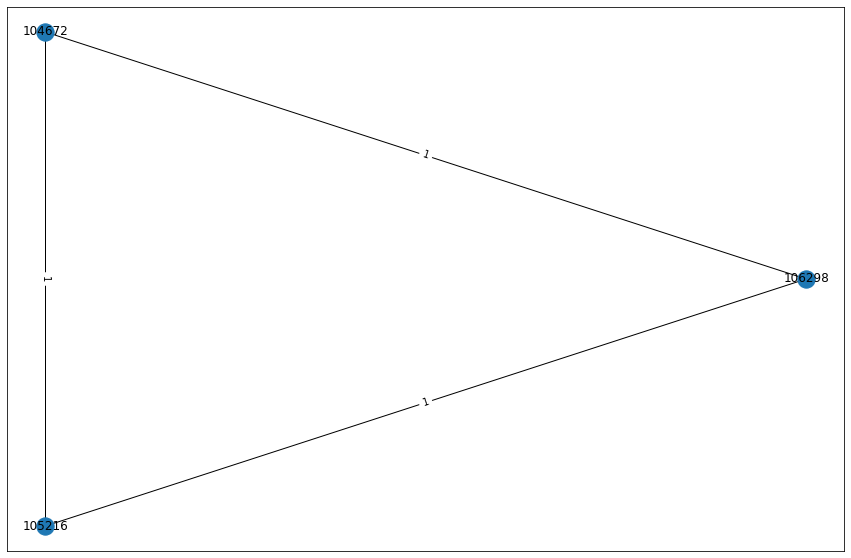

In [53]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, '104672')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Asortativnost:
Homofilija - tendencija ljudi da stvaraju veze sa sebi slicnim ljudima
U analizi socijalnih mreze homofilija u formi asortativnosti - cvorovi imaju tendenciju da se povezuju sa cvorovima slicnog stepena

In [54]:
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.21868975600564688
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.22945507317379313


In [55]:
#12 Koji teniseri predstavljaju jezgro mreze?
core_number = nx.core_number(G)
print(core_number)#dict

max_core_number = max(core_number.values()) #max value u dict
print(max_core_number)

core = nx.k_core(G, max_core_number)
for player_id in core:
    print(player_id)
    print(nx.get_node_attributes(G, 'name')[player_id])

{'105467': 1, '104022': 17, '105554': 2, '105292': 2, '200031': 1, '105671': 9, '106044': 14, '124079': 2, '121411': 1, '105732': 20, '106214': 3, '126846': 1, '105587': 1, '132283': 10, '206000': 1, '200711': 1, '104745': 20, '105063': 2, '105515': 1, '106072': 4, '104593': 1, '106401': 20, '104122': 5, '105589': 9, '123795': 1, '105882': 8, '105943': 2, '104534': 11, '104755': 20, '202165': 1, '106281': 4, '106043': 20, '200514': 1, '103852': 20, '122078': 2, '106121': 20, '200278': 2, '200045': 1, '109698': 1, '105676': 20, '106432': 20, '200384': 1, '105614': 11, '105502': 1, '126613': 1, '105430': 18, '105691': 1, '104925': 20, '127339': 1, '106138': 1, '104907': 2, '108739': 1, '111192': 1, '207415': 1, '106150': 2, '105577': 16, '111459': 1, '105163': 1, '104731': 20, '124126': 1, '111200': 10, '126523': 2, '126174': 1, '111153': 1, '105967': 7, '144817': 2, '103970': 15, '106233': 20, '105899': 2, '104926': 20, '126102': 1, '105641': 1, '110602': 9, '105932': 20, '105902': 6, '

In [56]:
#13 Ko su teniseri koji povezuju razlicite grupe u okviru mreze -> pronalazimo bridgeve u ovkviru mreze grane koje povezuju razlicite grupe u okviru mreze
bridges = nx.bridges(G)
list(bridges)

[('105467', '105499'),
 ('104022', '202130'),
 ('200031', '105683'),
 ('121411', '105349'),
 ('126846', '103852'),
 ('105587', '128034'),
 ('206000', '202358'),
 ('200711', '104547'),
 ('105515', '104468'),
 ('104593', '106210'),
 ('104122', '205734'),
 ('123795', '111761'),
 ('105882', '106325'),
 ('105882', '200384'),
 ('202165', '207176'),
 ('202165', '105812'),
 ('200514', '110602'),
 ('106121', '105493'),
 ('106121', '105147'),
 ('200045', '200460'),
 ('109698', '126174'),
 ('105502', '106353'),
 ('126613', '144776'),
 ('105691', '105683'),
 ('127339', '105992'),
 ('106138', '110602'),
 ('108739', '106175'),
 ('111192', '106000'),
 ('207415', '207400'),
 ('106150', '105812'),
 ('111459', '106026'),
 ('105163', '104259'),
 ('124126', '200250'),
 ('126174', '200483'),
 ('126174', '208029'),
 ('111153', '111581'),
 ('105967', '106228'),
 ('105967', '111197'),
 ('144817', '122236'),
 ('144817', '104597'),
 ('103970', '144645'),
 ('106233', '105299'),
 ('126102', '111167'),
 ('105641',

14. Kolika je gustina svake od modelovanih mreza? 
Gustina mreza moze se odrediti iz Gephi alata (Statistics -> Graph density) 
Racuna se za neusmerene grafove kao d = (2m)/n(n-1)
m -> broj grana
n -> broj cvorova

Rezultat:
<img src="img/graph_density.png" width=1000 height=1000 />

In [57]:
#koristeci python i networkx
density = nx.density(G)
print(f"Gustina mreze koristeci biblioteku network x je: {density}")


Gustina mreze koristeci biblioteku network x je: 0.028422651334345846


In [58]:
#15 U kojoj mrezi povezane i centralizovane mreze
#izracunacemo degree_centrality, closeness_centrality, information_centrality, betweenes_centrality i opisacemo znacenje tih vrednosti
DC = nx.degree_centrality(G)
import operator
print(sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:5])
#vazni cvorovi imaju veliki broj konekcija; broj direktnih suseda svakog cvora u mrezi
#akteri u mrezi sa vecim brojem relacija manje zavisni u odnosu na druge aktere

CC = nx.closeness_centrality(G)
print(sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:5])
#vazni cvorovi su blizi drugim cvorovima, vazniji cvorovi centralniji polozaj u mrezi

BC = nx.betweenness_centrality(G)
print(sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:5])
#vazni cvorovi povezuju druge cvorove, mostovi posrednici izmedju ostalih cvorova u mrezi
#vazni cvorovi se nalaze na vecem broju najkracih putanja

#check if graph is connected
print(nx.is_connected(G))

#graf nije povezan ne moze se izracunati information_centrality
#nije povezan postoji grupa ljudi koji nisu igrali jedni sa drugima -> ne postoji protok informacija

[('104926', 0.14593301435406697), ('106233', 0.13157894736842105), ('126774', 0.12679425837320574), ('100644', 0.12440191387559808), ('104755', 0.12200956937799043)]
[('104926', 0.38868304352899985), ('106233', 0.3877373426931629), ('111575', 0.3863273887197332), ('104269', 0.3835380212921539), ('105173', 0.3817007134057244)]
[('104655', 0.06984202008882845), ('104291', 0.0438665094230823), ('104926', 0.033726444430694766), ('105657', 0.031028324113313695), ('106210', 0.030991357611591424)]
False


#habovi su vezani za degree_centrality i susedima onim sa najvecim vrednostima ove metrike iscrtati u gephiju videti TODO

16. Koje su prosecne distance, a koliki dijametar u okviru modelovanih mreza? 
Average Path length: 3.1371012285965936
Diameter: 11

In [97]:
#19. Da li mreza iskazuje osobine malog sveta?

#Mreza nije povezana, pa se ne moze izracunati prosecna udaljenost cvorova, vec je moguce naci najvecu povezanu komponentu pa analizirati nju na osnovu prosecne udaljenosti cvorova koja je izracunata i prema koeficijentu klasterizacije izracunatim za tu najvecu komponentu

print(nx.number_connected_components(G))
largest_connected_component = max(nx.connected_components(G), key=len) #vraca set cvorova
print(len(largest_connected_component))

print("Velicine svih povezanih komponenti: ")
for comp in nx.connected_components(G):
          print(len(comp))

#formiramo graf
graph_connected_component = G.copy()
graph_connected_component.remove_nodes_from(G.nodes()-largest_connected_component)
        
var_path = nx.average_shortest_path_length(graph_connected_component)
print(var_path)
print("Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:")
print((var_path/(len(largest_connected_component)))*100)

print("Prosecan koeficijent klasterizacije")
print(nx.average_clustering(graph_connected_component))


18
366
Velicine svih povezanih komponenti: 
366
19
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3.137704918032787
Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:
0.8572964256920184
Prosecan koeficijent klasterizacije
0.139982038597597


In [98]:
#20. Ego mreze i osobine
#Novak Djokovic 104925
Novak_ego = nx.ego_graph(G, '104925', undirected=True)
Novak_ego.name = "novak"
print(nx.info(Novak_ego))

#Roger Federer 103819
Roger_ego = nx.ego_graph(G, '103819', undirected=True)
Roger_ego.name = "roger"
print(nx.info(Roger_ego))

#Rafael Nadal 104745
Nadal_ego = nx.ego_graph(G, '104745', undirected=True)
Nadal_ego.name = "nadal"
print(nx.info(Nadal_ego))

#sacuvaj u odredjenom formatu
nx.write_gexf(Novak_ego, "models/djokovic_2018.gexf")
nx.write_gexf(Roger_ego, "models/federer_2018.gexf")
nx.write_gexf(Nadal_ego, "models/nadal_2018.gexf")

#unija Djokovic Federer Nadal
ego_union = nx.disjoint_union(Novak_ego, Roger_ego)
ego_union = nx.disjoint_union(Nadal_ego, Nadal_ego)

ego_graphs = [Novak_ego, Roger_ego, Nadal_ego]

ego_player_nadal_djokovic_federer = set()

for H in ego_graphs:
    for player_id in H: 
        ego_player_nadal_djokovic_federer.add(player_id)
    
print(len(ego_player_nadal_djokovic_federer))
#set objekat je unique, ne dozvoljava duplikate
print(len(skup_id))
#analizirati poziciju ego cvora unutar svake od ego mreza TODO(plt.show())
#analizirati ugradjenost svake od ego mreza unutar celokupne mreze (TODO)
#Unifikacija ego mreza (koliki procenat ucestvuje u njoj). Sprovesti klasterisanje na 3 klastera i na osnovu dobijenih rezultata
#dati interpretaciju kriterijuma pripadnosti klasterima



Name: novak
Type: Graph
Number of nodes: 43
Number of edges: 324
Average degree:  15.0698
Name: roger
Type: Graph
Number of nodes: 45
Number of edges: 355
Average degree:  15.7778
Name: nadal
Type: Graph
Number of nodes: 36
Number of edges: 229
Average degree:  12.7222
81
419


Analiza ugradjenosti svake od ego mreza unutar celokupne mreze (uradjena je u Gephi alatu primenom odgovarajuceg filtera i odgovarajuceg layout-a prikaza za svaki od navedenih cvorova -> unese se id cvora za koji hocemo da prikazemo ego mrezu i primenom odgovarajuceg filtra i nacina prikaza prikaze se jasno definisana struktura ego mreze i njena ugradjenost u celokupnu mrezu) 

Novak Djokovic

<img src="img/graph_ego_djokovic.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/graph_ego_nadal.png" width=1000 height=1000 />

Roger Federer

<img src="img/graph_ego_roger.png" width=1000 height=1000 />



Analiza pozicije svakog ego cvora u okviru sopstvene ego mreze

Novak Djokovic

<img src="img/novak_djokovic_node.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/rafael_nadal_node.png" width=1000 height=1000 />

Roger Federer

<img src="img/roger_federer_node1.png" width=1000 height=1000 />



In [76]:
#23 Analizirati mrezu dobijenu unifikacijom ego mreza clanova Velike trojke. Koji procenat cvorova mreze svih tenisera ucestvuje u njoj. Sprovesti klasterisanje ovako dobijene mreze na 3 klastera i na osnovu dobijenih rezultata dati interpretaciju kriterijuma pripadnosti klasterima

# ego_player_nadal_djokovic_federer igraci iz ego mreza dobijeni njihovom unijom i smesteni u set
# skup_id svi igraci
from networkx.algorithms import community

percentage_ego = (len(ego_player_nadal_djokovic_federer)/len(skup_id))*100
print("Procentualno: ");
print(percentage_ego);

G_copied = G.copy();
G_copied.remove_nodes_from(G.nodes - ego_player_nadal_djokovic_federer)
print(len(G_copied.nodes)) #verifikovano

async_fluids_results = community.asyn_fluidc(G_copied,3, seed = 0) #ovaj algoritam na pocetku izabere nasumicno izabere 3 celine, a onda iterativno dodaje uzimavsi u obzir sam graf i njegove susede. Proces se ponavlja do dostizanja konverfencije
community1 = next(async_fluids_results)
community2 = next(async_fluids_results)
community3 = next(async_fluids_results)
#u zbiru tacno 81
print(len(community1))
print(len(community2))
print(len(community3))
#ispis pripadnosti odgovarajucim cvorovima
print(community1)
print(community2)
print(community3)

#todo formiraj graf u gephiju i analiziraj grupe cvorova koji pripadaju celini

Procentualno: 
19.331742243436754
81
24
24
33
{'103970', '104312', '106432', '105449', '105311', '106045', '105376', '106421', '104925', '104545', '105385', '105062', '105916', '200282', '105041', '105577', '144719', '126774', '105077', '106121', '105138', '105074', '105683', '111202'}
{'105173', '106210', '106233', '106148', '105166', '104926', '104620', '106065', '104871', '105815', '104198', '105583', '104527', '105806', '105357', '104297', '105643', '105373', '105238', '105550', '106000', '104547', '105657', '105379'}
{'104259', '105676', '105936', '104607', '104792', '106415', '105223', '105453', '104745', '104999', '100644', '105227', '105932', '104269', '106401', '106378', '103819', '103607', '105777', '109739', '105526', '104898', '104534', '104919', '104755', '104468', '105332', '104731', '105051', '106043', '111575', '106423', '133430'}
